# Before you start with this Data Understanding Notebook

This notebook is part of the Vectice tutorial project notebook series. It illustrates how to log the assets documented in the "Data Understanding" phase of the **"Tutorial: Forecast in store-unit sales"** project you can find in your personal Vectice workspace.

### Pre-requisites:
Before using this notebook you will need:
* An account in Vectice
* An API key to connect to Vectice through the APIs
* The Phase Id of the project where you want to log your work

Refer to Vectice Tutorial Guide for more detailed instructions: https://docs.vectice.com/getting-started/tutorial


### Other Resources
*   Vectice Documentation: https://docs.vectice.com/ </br>
*   Vectice API documentation: https://api-docs.vectice.com/

In [15]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Install the latest Vectice Python client library

In [ ]:
%pip install --q vectice -U

## Get started by connecting to Vectice

In [ ]:
import vectice

connect = vectice.connect(api_token="your-api-key") #Paste your API key

## Specify which project phase you want to document
In Vectice app, navigate to your personal workspace inside your default Tutorial project go to the Data Understanding phase and copy paste your Phase Id below.

In [ ]:
phase = connect.phase("PHA-xxxx") #Paste your own Data Understanding Phase ID

## Next we are going to create an iteration
An iteration allows you to organize your work in repeatable sequences. You can have multiple iteration within a phase. Iteration can be organized into sections.

In [ ]:
iteration = phase.create_or_get_current_iteration()

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/vectice/GettingStarted/main/23.3/tutorial/SampleSuperstore.csv", converters = {'Postal Code': str})
df.to_csv("SampleSuperstore.csv", index=False)

## Log a dataset
Use the following code block to create a local dataset and generate a graph:

In [ ]:
origin_ds = vectice.FileResource(paths="SampleSuperstore.csv", dataframes=df)


origin_dataset = vectice.Dataset.origin(
    name="ProductSales Origin",
    resource=origin_ds, 
)

In [ ]:
iteration.log(origin_dataset, section = "collect initial data")

In [ ]:
iteration.log(str(df.columns.values), section = "describe data")

In [ ]:
## Checking for Multicollinearity
corr_matrix=df.select_dtypes("number").drop("Sales",axis=1).corr()
sns.heatmap(corr_matrix);
plt.savefig("corr_matrix.png")

## Log graphs

You can log multiple items to a single iteration by using the `iterarion.log()` method.

In [ ]:
iteration.log("corr_matrix.png", section = "explore data")

/var/folders/db/rdyx07495wxbzv8q924p0tph0000gn/T/ipykernel_56551/862432529.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Quantity"])


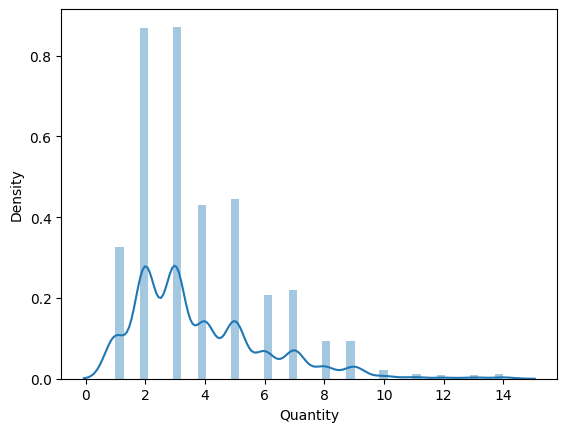

In [22]:
#Checking for outliers
sns.distplot(df["Quantity"])
plt.savefig("Quantity.png")

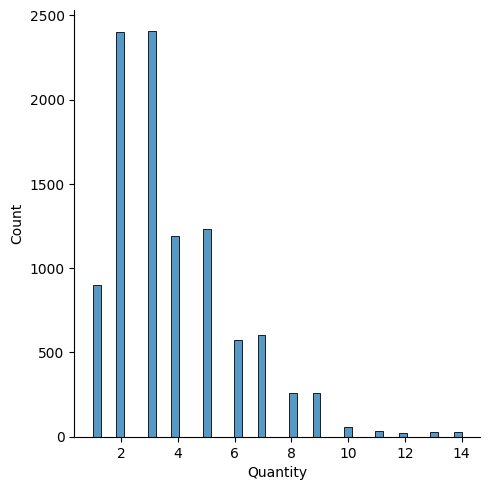

In [23]:
#Checking for outliers
sns.displot(df["Quantity"])
plt.savefig("Quantity.png")

In [ ]:
iteration.log("Quantity.png", section = "explore data")

In [ ]:
iteration.complete()

## 🥇 Congrats! You learn how to succesfully use Vectice to auto-document the Data Understanding phase of the Tutorial Project.<br>
### Next we encourage you to explore other notebooks in the tutorial series. You can find those notebooks in Vectice Tutorial Guide: [Want to learn more about the other phases of the tutorial project?](https://docs.vectice.com/getting-started/tutorial#want-to-learn-more-about-the-other-phases-of-the-tutorial-project)